In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-dataset/laptop_price - dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/laptop-price-dataset/laptop_price - dataset.csv') 

In [3]:
df.head() 

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


#### information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

#### checking null values

In [5]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

### checking duplicated values 

In [6]:
df.duplicated().sum() 

0

In [7]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0) 

In [8]:
import seaborn as sns

<Axes: xlabel='Touchscreen', ylabel='Price (Euro)'>

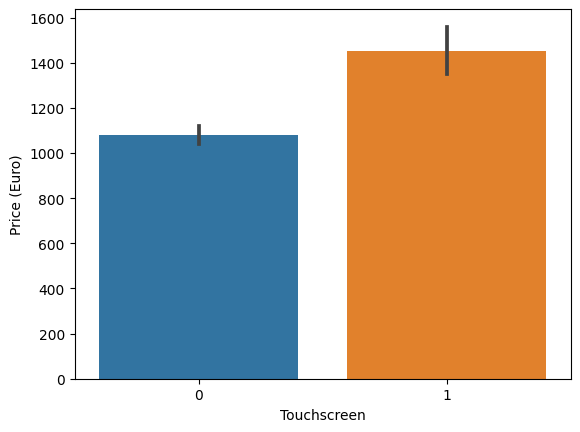

In [9]:
sns.barplot(x=df['Touchscreen'],y=df['Price (Euro)'])

In [10]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0) 

In [11]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [12]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [13]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Touchscreen,Ips,X_res,Y_res
627,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,4,128GB SSD,Intel,HD Graphics 620,No OS,2.20,468.00,0,0,Full HD 1920,1080
375,HP,15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10),Notebook,15.6,Full HD 1920x1080,AMD,A9-Series 9420,3.0,4,256GB SSD,AMD,Radeon R5,Windows 10,1.91,488.99,0,0,Full HD 1920,1080
596,Lenovo,ThinkPad Yoga,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 7500U,2.7,8,512GB SSD,Intel,HD Graphics 620,Windows 10,1.37,2025.00,1,1,IPS Panel Full HD / Touchscreen 1920,1080
724,MSI,GL72M 7REX,Gaming,17.3,Full HD 1920x1080,Intel,Core i7 7700HQ,2.8,8,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 1050 Ti,Windows 10,2.70,1348.48,0,0,Full HD 1920,1080
312,MSI,GE63VR 7RF,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel,Core i7 7700HQ,2.8,16,256GB SSD + 1TB HDD,Nvidia,GeForce GTX 1070,Windows 10,2.80,2099.00,0,1,IPS Panel Full HD 1920,1080


In [14]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [15]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
 15  Touchscreen          1275 non-null   i

In [17]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 

In [18]:
encoder = LabelEncoder()
df['Memory'] = encoder.fit_transform(df['Memory']) 
df['Product'] = encoder.fit_transform(df['Product']) 

In [19]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [20]:
df['GPU_Company'].value_counts()

GPU_Company
Intel     704
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [21]:
df.drop(columns = 'GPU_Type', inplace=True)

In [22]:
df = df[df['GPU_Company'] != 'ARM']

In [23]:
df['OpSys']

0            macOS
1            macOS
2            No OS
3            macOS
4            macOS
           ...    
1270    Windows 10
1271    Windows 10
1272    Windows 10
1273    Windows 10
1274    Windows 10
Name: OpSys, Length: 1274, dtype: object

In [24]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [25]:
df['os'] = df['OpSys'].apply(cat_os)

In [26]:
df.drop(columns=['OpSys'],inplace=True)

In [27]:
df.drop(columns = 'CPU_Type', inplace=True) 

In [28]:
df.drop(columns = 'ScreenResolution', inplace = True) 

In [29]:
df.drop(columns = ['X_res', 'Y_res', 'Inches'], inplace= True) 

In [30]:
X = df.drop(columns=['Price (Euro)'])
y = np.log(df['Price (Euro)'])

In [31]:
X

,Company,Product,TypeName,CPU_Company,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,Weight (kg),Touchscreen,Ips,ppi,os
0,Apple,300,Ultrabook,Intel,2.3,8,4,Intel,1.37,0,1,226.983005,Mac
1,Apple,301,Ultrabook,Intel,1.8,8,2,Intel,1.34,0,0,127.677940,Mac
2,HP,50,Notebook,Intel,2.5,8,16,Intel,1.86,0,0,141.211998,Others/No OS/Linux
3,Apple,300,Ultrabook,Intel,2.7,16,29,AMD,1.83,0,1,220.534624,Mac
4,Apple,300,Ultrabook,Intel,3.1,8,16,Intel,1.37,0,1,226.983005,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,580,2 in 1 Convertible,Intel,2.5,4,4,Intel,1.80,1,1,157.350512,Windows
1271,Lenovo,588,2 in 1 Convertible,Intel,2.5,16,29,Intel,1.30,1,1,276.053530,Windows
1272,Lenovo,196,Notebook,Intel,1.6,2,35,Intel,1.50,0,0,111.935204,Windows
1273,HP,2,Notebook,Intel,2.5,6,10,AMD,2.19,0,0,100.454670,Windows


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [33]:
X_train

,Company,Product,TypeName,CPU_Company,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,Weight (kg),Touchscreen,Ips,ppi,os
21,Lenovo,291,Gaming,Intel,2.5,8,5,Nvidia,2.50,0,1,141.211998,Windows
790,Asus,132,Gaming,Intel,2.8,8,5,Nvidia,2.24,0,0,141.211998,Windows
273,Lenovo,472,2 in 1 Convertible,Intel,2.6,16,29,Intel,1.36,1,0,209.800683,Windows
397,Lenovo,459,Notebook,Intel,2.5,8,16,Intel,1.90,0,1,157.350512,Windows
921,HP,112,Ultrabook,Intel,2.5,8,16,AMD,1.84,0,0,141.211998,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,59,Notebook,Intel,2.0,4,26,Nvidia,2.20,0,0,100.454670,Windows
299,Asus,610,Ultrabook,Intel,2.7,16,29,Nvidia,1.63,0,0,141.211998,Windows
493,Acer,59,Notebook,AMD,2.5,8,10,AMD,2.20,0,0,100.454670,Windows
527,Lenovo,211,Notebook,Intel,2.0,8,22,Nvidia,2.20,0,0,100.454670,Others/No OS/Linux


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [35]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

#### linear Regression 


In [36]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,7,12])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7715541856147561
MAE 0.22773587981440827


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Ridge regression

In [37]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,7,12])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7526257676451327
MAE 0.232349957375633


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Lasso Regression

In [38]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,7,12])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7562296255740062
MAE 0.2296555609372589


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Decision Tree

In [39]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,7,12])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7806813495372386
MAE 0.21442768409523413


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Random forest

In [40]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,7,12])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8894802232131542
MAE 0.15667239533341862


### XGBoost

In [41]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,7,12])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.885241018529664
MAE 0.14882004913112798


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### vooting ensemble

In [42]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,7,12])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8974474736419331
MAE 0.14981816642880016


### gradient Boosting 

In [43]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,2,3,7,12])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8875339168405452
MAE 0.14953757468551934


In [44]:
df.head()

,Company,Product,TypeName,CPU_Company,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,Weight (kg),Price (Euro),Touchscreen,Ips,ppi,os
0,Apple,300,Ultrabook,Intel,2.3,8,4,Intel,1.37,1339.69,0,1,226.983005,Mac
1,Apple,301,Ultrabook,Intel,1.8,8,2,Intel,1.34,898.94,0,0,127.677940,Mac
2,HP,50,Notebook,Intel,2.5,8,16,Intel,1.86,575.00,0,0,141.211998,Others/No OS/Linux
3,Apple,300,Ultrabook,Intel,2.7,16,29,AMD,1.83,2537.45,0,1,220.534624,Mac
4,Apple,300,Ultrabook,Intel,3.1,8,16,Intel,1.37,1803.60,0,1,226.983005,Mac
